In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats, GetEntropy
import scipy

In [2]:
import matplotlib as mpl
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(16,12,12,12)

# Thermodynamic limit

In [3]:
x_th = np.arange(5,50,0.1)
S_th = 0.15884297*x_th

# Strip geometry

In [4]:
Ne = 15
Ns = Ne
#non-thermal iterations
M0 = int(5e5)
M = int(5e6)

#aspect ratio Ly/Lx
rs = np.linspace(0.5, 2, 7, endpoint=True)
Lxs = np.sqrt(2*np.pi*Ns/rs)
Lys = Lxs*rs

## SWAP decomposition

In [5]:
p_means = np.zeros((rs.size,3))
p_vars = np.zeros((rs.size,3))

mod_means = np.zeros((rs.size,3))
mod_vars = np.zeros((rs.size,3))

sign_means = np.zeros((rs.size,3))
sign_vars = np.zeros((rs.size,3))

In [6]:
p_step_const = 0.132/np.sqrt(0.5)
mod_step_const = 0.131/np.sqrt(0.5)
sign_step_const = 0.1325/np.sqrt(0.5)

for i in range(1,rs.size):
    print(f"t = {rs[i]}j:")
    step = p_step_const*np.sqrt(rs[i])
    p = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_30/p_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means[i,0], p_vars[i,0] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means[i,0]} +- {np.sqrt(p_vars[i,0]/p.size)}")

    step = mod_step_const*np.sqrt(rs[i])
    mod = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_30/mod_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means[i,0], mod_vars[i,0] = Stats(mod)
    print(f"mod = {mod_means[i,0]} +- {np.sqrt(mod_vars[i,0]/mod.size)}")

    step = sign_step_const*np.sqrt(rs[i])
    sign = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_30/sign_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means[i,0], sign_vars[i,0] = Stats(sign)
    print(f"sign = {sign_means[i,0]} +- {np.sqrt(sign_vars[i,0]/sign.size)}")


p_step_const = 0.077/np.sqrt(0.5)
mod_step_const = 0.077/np.sqrt(0.5)
sign_step_const = 0.079/np.sqrt(0.5)

for i in range(rs.size):
    print(f"t = {rs[i]}j:")
    step = p_step_const*np.sqrt(rs[i])
    p = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_50/p_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means[i,1], p_vars[i,1] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means[i,1]} +- {np.sqrt(p_vars[i,1]/p.size)}")

    step = mod_step_const*np.sqrt(rs[i])
    mod = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_50/mod_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"mod acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means[i,1], mod_vars[i,1] = Stats(mod)
    print(f"mod = {mod_means[i,1]} +- {np.sqrt(mod_vars[i,1]/mod.size)}")

    step = sign_step_const*np.sqrt(rs[i])
    sign = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_50/sign_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means[i,1], sign_vars[i,1] = Stats(sign)
    print(f"sign = {sign_means[i,1]} +- {np.sqrt(sign_vars[i,1]/sign.size)}")


p_step_const = 0.0415/np.sqrt(0.5)
mod_step_const = 0.0415/np.sqrt(0.5)
sign_step_const = 0.043/np.sqrt(0.5)

for i in range(rs.size):
    print(f"t = {rs[i]}j:")
    step = p_step_const*np.sqrt(rs[i])
    p = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_70/p_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"p acceptance: {p[0,0]}")
    p = p[M0:]
    p_means[i,2], p_vars[i,2] = Stats((p[:,0] == p[:,1]))
    print(f"p = {p_means[i,2]} +- {np.sqrt(p_vars[i,2]/p.size)}")

    step = mod_step_const*np.sqrt(rs[i])
    match rs[i]:
        case 1.25:
            step = 0.073
        case 1.5:
            step = 0.08
        case 1.75:
            step = 0.087
    mod = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_70/mod_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"mod acceptance: {mod[0]}")
    mod = mod[M0:]
    mod_means[i,2], mod_vars[i,2] = Stats(mod)
    print(f"mod = {mod_means[i,2]} +- {np.sqrt(mod_vars[i,2]/mod.size)}")

    step = sign_step_const*np.sqrt(rs[i])
    sign = np.real(np.load(f"IQHE_entropy_results/N_15/MC/strip/acceptance_70/sign_swap_N_{Ne}_t_{rs[i]:.2f}_step_{step:.3f}.npy"))
    print(f"sign acceptance: {sign[0]}")
    sign = sign[M0:]
    sign_means[i,2], sign_vars[i,2] = Stats(sign)
    print(f"sign = {sign_means[i,2]} +- {np.sqrt(sign_vars[i,2]/sign.size)}")

t = 0.75j:
p acceptance: 0.29978559999999316
p = 0.23722372506139444 +- 0.00014179352333171342
acceptance: 0.3006988000000163
mod = 0.3509649202894191 +- 0.00043169050059510127
sign acceptance: 0.3097052000000083
sign = 0.34887910601822325 +- 0.00030086915380715115
t = 1.0j:
p acceptance: 0.29961160000002096
p = 0.25282372159472855 +- 0.00014487691610993246
acceptance: 0.3047035999999946
mod = 0.42335962643779607 +- 0.0004562150089127699
sign acceptance: 0.3127262000000103
sign = 0.4258863162370308 +- 0.00028779287295417204
t = 1.25j:
p acceptance: 0.29858060000003706
p = 0.2610697197622845 +- 0.0001464059505414565
acceptance: 0.3074939999999974
mod = 0.469587122353136 +- 0.0004985412816401347
sign acceptance: 0.31147699999997214
sign = 0.5195515288705639 +- 0.00026722247883599224
t = 1.5j:
p acceptance: 0.3000701999999806
p = 0.2790774935383348 +- 0.00014951523376071667
acceptance: 0.30907079999999604
mod = 0.4909923930720817 +- 0.00040036590184488747
sign acceptance: 0.31405219999999

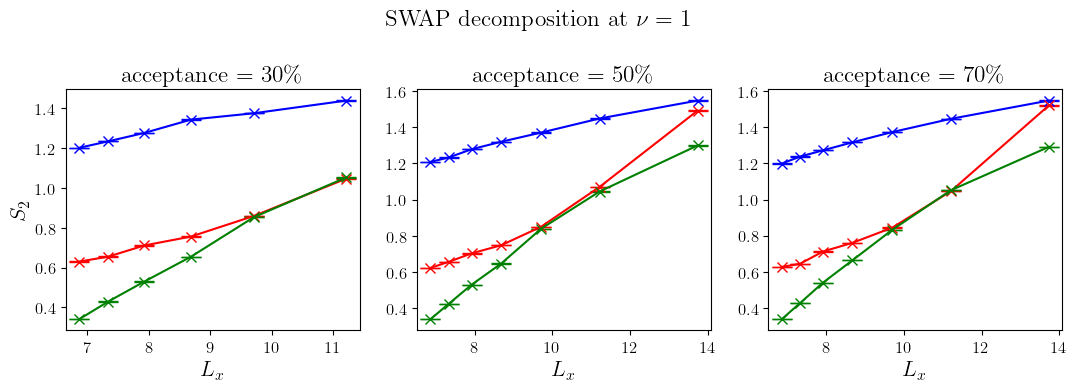

In [7]:
acc = [30, 50, 70]

fig, ax = plt.subplots(1,3, figsize=(11,4))
fig.suptitle("SWAP decomposition at $\\nu=1$")

ax[0].errorbar(Lxs[1:], -np.log(p_means[1:,0]), np.sqrt(p_vars[1:,0]/p_means[1:,0]**2)/np.sqrt(M-M0), marker='x',
             color='blue', markersize=7, capsize=7)
ax[0].errorbar(Lxs[1:], -np.log(mod_means[1:,0]), np.sqrt(mod_vars[1:,0]/mod_means[1:,0]**2)/np.sqrt(M-M0), marker='x',
             color='red', markersize=7, capsize=7)
ax[0].errorbar(Lxs[1:], -np.log(sign_means[1:,0]), np.sqrt(sign_vars[1:,0]/sign_means[1:,0]**2)/np.sqrt(M-M0), marker='x',
             color='green', markersize=7, capsize=7)
ax[0].set_title("acceptance = $30\%$")
ax[0].set_ylabel("$S_{2}$")
ax[0].set_xlabel("$L_{x}$")

for i in range(1,3):
    ax[i].errorbar(Lxs, -np.log(p_means[:,i]), np.sqrt(p_vars[:,i]/p_means[:,i]**2)/np.sqrt(M-M0), marker='x',
                color='blue', markersize=7, capsize=7)
    ax[i].errorbar(Lxs, -np.log(mod_means[:,i]), np.sqrt(mod_vars[:,i]/mod_means[:,i]**2)/np.sqrt(M-M0), marker='x',
                color='red', markersize=7, capsize=7)
    ax[i].errorbar(Lxs, -np.log(sign_means[:,i]), np.sqrt(sign_vars[:,i]/sign_means[:,i]**2)/np.sqrt(M-M0), marker='x',
                color='green', markersize=7, capsize=7)
    ax[i].set_title(f"acceptance = ${acc[i]}\%$")
    ax[i].set_xlabel("$L_{x}$")

fig.tight_layout()

## Entropy

In [9]:
S_MC = np.zeros((rs.size,3))
err_MC = np.zeros((rs.size,3))

S_MC[1:,0] = -np.log(p_means[1:,0]*mod_means[1:,0]*sign_means[1:,0])
err_MC[1:,0] = np.sqrt(p_vars[1:,0]/(p_means[1:,0]**2) + mod_vars[1:,0]/(mod_means[1:,0]**2) + sign_vars[1:,0]/(sign_means[1:,0]**2))/np.sqrt(M-M0)

S_MC[:,1] = -np.log(p_means[:,1]*mod_means[:,1]*sign_means[:,1])
err_MC[:,1] = np.sqrt(p_vars[:,1]/(p_means[:,1]**2) + mod_vars[:,1]/(mod_means[:,1]**2) + sign_vars[:,1]/(sign_means[:,1]**2))/np.sqrt(M-M0)

S_MC[:,2] = -np.log(p_means[:,2]*mod_means[:,2]*sign_means[:,2])
err_MC[:,2] = np.sqrt(p_vars[:,2]/(p_means[:,2]**2) + mod_vars[:,2]/(mod_means[:,2]**2) + sign_vars[:,2]/(sign_means[:,2]**2))/np.sqrt(M-M0)

#divide by 2 for 2 boundaries
S_MC /= 2
err_MC /= 2

In [10]:
popt_30, pcov_30 = np.polyfit(Lxs[1:], S_MC[1:,0], 1, w=1/err_MC[1:,0], cov=True)
popt_50, pcov_50 = np.polyfit(Lxs, S_MC[:,1], 1, w=1/err_MC[:,1], cov=True)
popt_70, pcov_70 = np.polyfit(Lxs, S_MC[:,2], 1, w=1/err_MC[:,2], cov=True)

### ED (overlap)

In [11]:
S_ED = np.zeros(rs.size)
for k in range(rs.size):
    M = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/ED/overlap_diag_N_{Ne}_r_{rs[k]:.3f}.dat", dtype=np.complex128)[:,0]
    S_ED[k] = -np.sum(np.log(M**2 + (1-M)**2))

# divide by 2 since we have 2 boundaries
S_ED /= 2

C:\Users\crist\AppData\Local\Temp\ipykernel_9652\3240076613.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  S_ED[k] = -np.sum(np.log(M**2 + (1-M)**2))


In [12]:
popt, pcov = np.polyfit(Lxs, S_ED, 1, cov=True)
print(f"scaling coeff {popt[0]} +- {np.sqrt(pcov[0,0])}")
y_ED = popt[0]*x_th + popt[1]

scaling coeff 0.15841956293329967 +- 1.795919633965041e-06


### comparison

(6.5, 14.0)

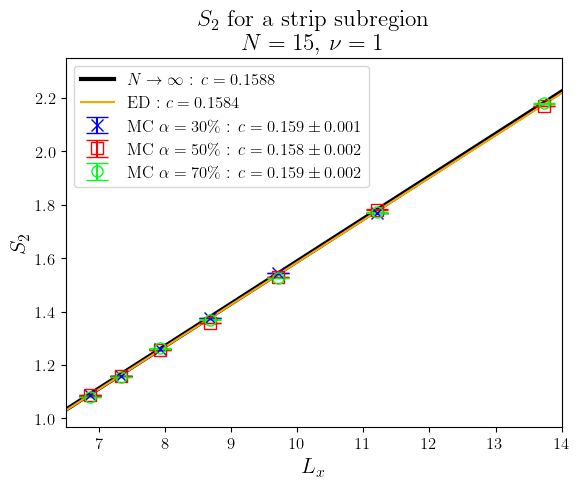

In [15]:
plt.plot(x_th,S_th, c='black', linewidth=3)
plt.plot(x_th,y_ED,c='orange', linewidth=1.5)
plt.errorbar(Lxs[1:], S_MC[1:,0], err_MC[1:,0], marker='x',
             color='blue', markersize=9, capsize=8, linestyle='none')
plt.errorbar(Lxs, S_MC[:,1], err_MC[:,1], marker='s', markerfacecolor='none',
             color='red', markersize=9, capsize=8, linestyle='none')
plt.errorbar(Lxs, S_MC[:,2], err_MC[:,2], marker='o', markerfacecolor='none',
             color=(0.,1,0.1), markersize=8, capsize=8, linestyle='none')

plt.title("$S_{2}$ for a strip subregion \n $N=15$, $\\nu=1$")
plt.ylabel("$S_{2}$")
plt.xlabel("$L_{x}$")
plt.legend(['$N \\to \infty$ : $c = 0.1588$', 'ED : $c = 0.1584$', f'MC $\\alpha=30\\%$ : $c = {popt_30[0]:.3f} \pm {np.sqrt(pcov_30[0,0]):.3f}$',
            f'MC $\\alpha=50\\%$ : $c = {popt_50[0]:.3f} \pm {np.sqrt(pcov_50[0,0]):.3f}$', f'MC $\\alpha=70\\%$ : $c = {popt_70[0]:.3f} \pm {np.sqrt(pcov_70[0,0]):.3f}$'])
plt.xlim(6.5,14)
#plt.savefig('MC_benchmark_v=1.png', dpi=350)
#plt.xlim(11.2099, 11.2101)
#plt.ylim(3.53,3.57)

# Circle geometry

## N = 30

In [4]:
Ne = 45
Ns = Ne
#non-thermal iterations
M0 = int(1e5)
M = int(5e6)

step = 0.062
t = 1j
boundaries = np.arange(0.2, 0.381, 0.02)
Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
l = boundaries*2*np.pi*Lx

In [11]:
ps = np.zeros((boundaries.size,2))
mods = np.zeros((boundaries.size,2))
signs = np.zeros((boundaries.size,2))
for i in range(boundaries.size):
    data = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/MC/circle/laughlin_p_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    ps[i] = data
    
    data = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/MC/circle/laughlin_mod_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    mods[i] = data

    data = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/MC/circle/laughlin_sign_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    signs[i] = data[0]

np.savetxt(f"laughlin_SWAP_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat", np.vstack((boundaries, ps.T, mods.T, signs.T)).T)


In [49]:
boundaries_30, S2_30, S2_p_30, S2_mod_30, S2_sign_30 = GetEntropy(30, 30, 5e6, 1e5, 1j, 0.078, 'circle')
boundaries_45, S2_45, S2_p_45, S2_mod_45, S2_sign_45 = GetEntropy(45, 45, 5e6, 1e5, 1j, 0.062, 'circle')

<ErrorbarContainer object of 3 artists>

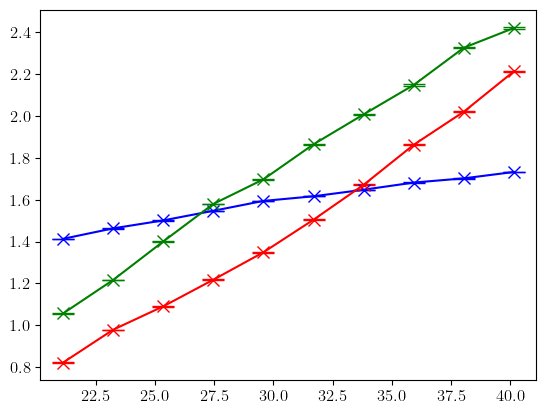

In [50]:
plt.errorbar(boundaries_45, S2_p_45[:,0], S2_p_45[:,1],color='blue', marker='x', markersize=9, 
             capsize=8, label='$S_{2,p}$')
plt.errorbar(boundaries_45, S2_mod_45[:,0], S2_mod_45[:,1],color='green', marker='x', markersize=9, 
             capsize=8, label='$S_{2,mod}$')
plt.errorbar(boundaries_45, S2_sign_45[:,0], S2_sign_45[:,1],color='red', marker='x', markersize=9, 
             capsize=8, label='$S_{2,sign}$')

In [61]:
popt_30, pcov_30 = np.polyfit(boundaries_30[1:], S2_30[1:,0], 1, cov=True, w=1/S2_30[1:,1])
popt_45, pcov_45 = np.polyfit(boundaries_45[1:], S2_45[1:,0], 1, cov=True, w=1/S2_45[1:,1])
x_fit = np.linspace(0, 100, 10, endpoint=True)
y_fit_30 = popt_30[0]*x_fit + popt_30[1]
y_fit_45 = popt_45[0]*x_fit + popt_45[1]

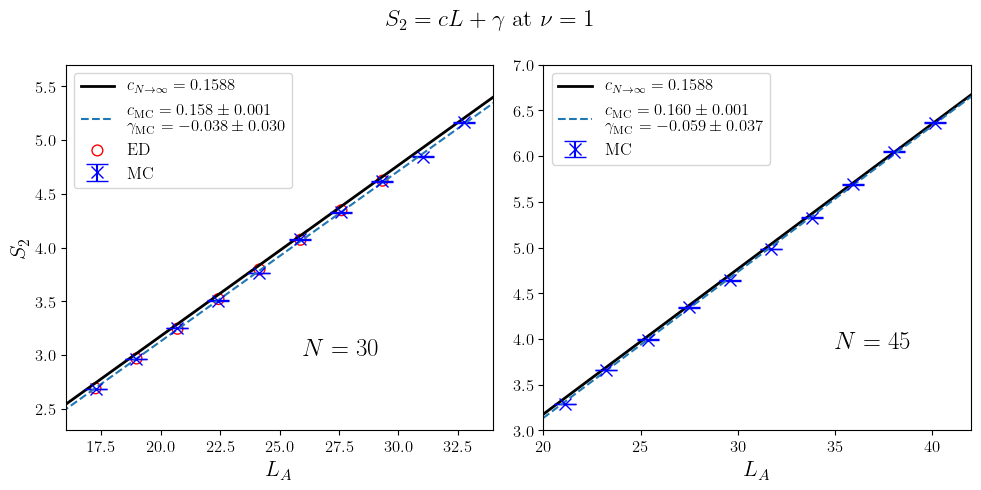

In [103]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("$S_{2} = cL + \\gamma$ at $\\nu = 1$", va='top')

ax[0].plot(x_th,S_th, c='black', linewidth=2, label='$c_{N \\to \\infty} = 0.1588$')
ax[0].errorbar(boundaries_30,S2_30[:,0],S2_30[:,1],color='blue', marker='x', markersize=9, 
             linestyle='none', capsize=8, label='MC')
ax[0].plot(x_fit, y_fit_30, '--',
           label='$c_\\mathrm{MC}$ '+f'$ = {popt_30[0]:.3f} \\pm {np.sqrt(pcov_30[0,0]):.3f}$ \n'+'$\\gamma_\\mathrm{MC}$ '+f'$ = {popt_30[1]:.3f} \\pm {np.sqrt(pcov_30[1,1]):.3f}$')
ax[0].scatter(boundaries_30[0:8],S_ED,color='red', marker='o', s=60, facecolor='none', label='ED')
ax[0].set_xlim(16,34)
ax[0].set_ylim(2.3, 5.7)
ax[0].text(x=26, y=3, s='$N=30$', fontsize=18)
ax[0].legend()
ax[0].set_xlabel('$L_{A}$')
ax[0].set_ylabel('$S_{2}$')

ax[1].plot(x_th,S_th, c='black', linewidth=2, label='$c_{N \\to \\infty} = 0.1588$')
ax[1].errorbar(boundaries_45,S2_45[:,0],S2_45[:,1],color='blue', marker='x', markersize=9, 
             linestyle='none', capsize=8, label='MC')
ax[1].plot(x_fit, y_fit_45, '--',
            label='$c_\\mathrm{MC}$ '+f'$ = {popt_45[0]:.3f} \\pm {np.sqrt(pcov_45[0,0]):.3f}$ \n'+'$\\gamma_\\mathrm{MC}$ '+f'$ = {popt_45[1]:.3f} \\pm {np.sqrt(pcov_45[1,1]):.3f}$')
ax[1].set_xlim(20,42)
ax[1].set_ylim(3,7)
ax[1].text(x=35, y=3.9, s='$N=45$', fontsize=18)
ax[1].set_xlabel('$L_{A}$')
ax[1].legend()
fig.tight_layout(pad=1)
fig.savefig("v=1 n=30,45.jpeg", dpi=350)

In [76]:
Ns = Ne = 30
norms = np.zeros(Ns)
data = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/ED/norm/laughlin_sq_norm_N_{Ne}_t_1.000.dat", dtype=np.complex128)
norms = np.sqrt(data[:,0])

boundaries_ED = np.arange(0.2, 0.341, 0.02)
S_ED = np.zeros(boundaries_ED.size)

for i in range(boundaries_ED.size):
    matrix = np.load(f"IQHE_entropy_results/N_{Ne}/ED/overlap/laughlin_overlaps_N_{Ne}_circle_{boundaries_ED[i]:.3f}.npy")
    matrix /= (norms * np.reshape(norms.T, (-1,1)))
    re = np.real(matrix)
    e, _ = np.linalg.eigh(re)
    S_ED[i] = -np.sum(np.log(e**2 + (1-e)**2))

In [75]:
S_ED

array([2.69042931])

In [24]:
print(.15884297*l)
print(S_ED)
print(S_IQHE)
print(err_IQHE)

[2.74049128 3.01454041 3.28858953 3.56263866 3.83668779 4.11073692
 4.38478605 4.65883517]
[2.69042931 2.9677357  3.24437028 3.52048749 3.7962002  4.07159105
 4.3467215  4.62163818]
[2.68061191 2.96356173 3.2544129  3.50720723 3.76251311 4.07502698
 4.32672821 4.6144666 ]
[0.00118348 0.00132343 0.001503   0.00163625 0.00182547 0.00195751
 0.00222634 0.002546  ]


In [25]:
popt, pcov = np.polyfit(l, S_ED, deg=1, cov=True)
print(popt, np.sqrt(pcov[0,0]))

[ 0.15988241 -0.0664764 ] 9.22082276782678e-05


(2.5, 10.0)

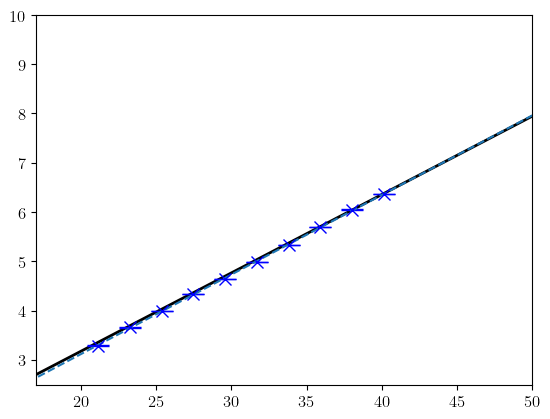

In [29]:
plt.plot(x_th,S_th, c='black', linewidth=2)
#plt.scatter(l,S_ED,color='red', marker='o', s=60, facecolor='none', label='ED')
plt.errorbar(l,S_IQHE,err_IQHE,color='blue', marker='x', markersize=9, 
             linestyle='none', capsize=8, label='MC')
plt.plot(x_fit, y_fit, '--')
plt.xlim(17,50)
plt.ylim(2.5,10)

## N = 15

In [7]:
Ne = 15
Ns = 15
#non-thermal iterations
M0 = int(1e5)
M = int(5e6)

step = 0.108
t = 1j

In [5]:
Ne = 15
Ns = 15
#non-thermal iterations
M0 = int(1e5)
M = int(5e6)

step = 0.108
t = 1j

boundaries = np.arange(0.1, 0.221, 0.01)
ps = np.zeros((boundaries.size,2))
mods = np.zeros((boundaries.size,2))
signs = np.zeros((boundaries.size,2))
for i in range(boundaries.size):
    data = np.loadtxt(f"IQHE_entropy_results/N_15/MC/acceptance_50/circle/laughlin_p_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    ps[i] = data
    
    data = np.loadtxt(f"IQHE_entropy_results/N_15/MC/acceptance_50/circle/laughlin_mod_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    mods[i] = data

    data = np.loadtxt(f"IQHE_entropy_results/N_15/MC/acceptance_50/circle/laughlin_sign_Ne_{Ne}_Ns_{Ns}_t_1.00_circle_{boundaries[i]:.3f}_step_{step:.3f}.dat")
    signs[i] = data[0]

np.savetxt(f"laughlin_SWAP_Ne_15_Ns_15_t_1.00_step_0.108_circles.dat", np.vstack((boundaries, ps.T, mods.T, signs.T)).T)


FileNotFoundError: IQHE_entropy_results/N_15/MC/acceptance_50/circle/laughlin_p_Ne_15_Ns_15_t_1.00_circle_0.100_step_0.108.dat not found.

In [22]:
Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
data = np.loadtxt(f"laughlin_SWAP_Ne_{Ne}_Ns_{Ns}_t_1.00_step_{step:.3f}_circles.dat")
rs = data[:,0]
l = data[:,0]*2*np.pi*Lx
p_IQHE = data[:,1:3]
mod_IQHE = data[:,3:5]
sign_IQHE = data[:,5:7]

In [23]:
S_IQHE = -np.log(p_IQHE[:,0]*mod_IQHE[:,0]*sign_IQHE[:,0])
err_IQHE = np.sqrt(p_IQHE[:,1]/(p_IQHE[:,0]**2) + mod_IQHE[:,1]/(mod_IQHE[:,0]**2) + sign_IQHE[:,1]/(sign_IQHE[:,0]**2))/np.sqrt(M-M0)


popt, pcov = np.polyfit(l[2:], S_IQHE[2:], 1, cov=True)
print(f"scaling coeff {popt[0]} +- {np.sqrt(pcov[0,0])}\n intercept {popt[1]} +- {np.sqrt(pcov[1,1])}")

x_fit = np.linspace(0, 14, 10, endpoint=True)
y_fit = popt[0]*x_fit + popt[1]

scaling coeff 0.16480291796366844 +- 0.0005785700524794328
 intercept -0.1483693810918719 +- 0.006102488595762965


### ED (overlap)

In [24]:
norms = np.zeros(Ns)
data = np.loadtxt(f"IQHE_entropy_results/N_15/ED/laughlin_sq_norm_N_{Ns}_t_1.000.dat", dtype=np.complex128)
norms = np.sqrt(data[:,0])

S_ED = np.zeros(l.size)

for i in range(l.size):
    matrix = np.load(f"laughlin_overlaps_N_15_circle_{rs[i]:.3f}.npy")
    matrix /= (norms * np.reshape(norms.T, (-1,1)))
    e, _ = np.linalg.eigh(matrix)
    S_ED[i] = -np.sum(np.log(e**2 + (1-e)**2))

### comparison

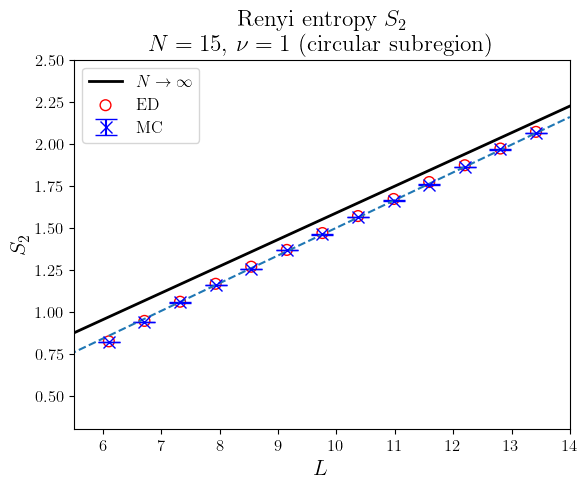

In [41]:

plt.plot(x_th,S_th, c='black', linewidth=2)
plt.scatter(l,S_ED,color='red', marker='o', s=60, facecolor='none')
plt.errorbar(l, S_IQHE, err_IQHE, marker='x',
             color='blue', markersize=9, capsize=8, linestyle='none')

plt.title("Renyi entropy $S_{2}$ \n $N=15$, $\\nu=1$  (circular subregion)")
plt.ylabel("$S_{2}$")
plt.xlabel("$L$")
plt.legend(['$N \\to \infty$', 'ED', 'MC'])
plt.plot(x_fit, y_fit, '--')
plt.xlim(5.5,14)
plt.ylim(0.3,2.5)
plt.savefig('MC_benchmark_v=1_circular.png', dpi=350)
#plt.xlim(11.2099, 11.2101)
#plt.ylim(3.53,3.57)